In [1]:
import cPickle as pkl 
import numpy as np
f = './forcing/0_40x/f_data_tv_40.pkl'

f = open(f, 'rb')
d = pkl.load(f)
f.close() 


In [2]:
d.keys() 

['dt_qg_real1',
 'dt_qg_vadv',
 'v_geos',
 'lwdn_sfc',
 'dt_ug_total',
 'lhf_flux',
 'dt_vg_fino',
 'temp_vadv',
 'temp_rad',
 'lon_idx',
 'temp_conv',
 'target_lat',
 'ps',
 'phalf',
 'dt_qg_total',
 'target_lon',
 'lon',
 'ts',
 'dt_qg_hadv',
 'lwup_sfc',
 'qflux',
 'temp_real1',
 'shf_flux',
 'dt_vg_pres',
 'rhum',
 'dt_vg_total',
 'dt_ug_vadv',
 'u_geos',
 'temp_cond',
 'dt_ug_hadv',
 'flux_lwdn',
 'swdn_toa',
 'dt_ug_fino',
 'dt_ug_real1',
 'lat',
 'alpha',
 'dt_vg_cori',
 'shum',
 'omega',
 'dt_ug_cori',
 'temp_diffusion',
 'dt_vg_real1',
 'swdn_sfc',
 'temp',
 'zfull',
 'zhalf',
 'temp_fino',
 'temp_hadv',
 'dt_qg_param',
 'dt_ug_pres',
 'flux_lwup',
 'dt_vg_vadv',
 'virtual_temperature',
 'temp_param',
 'temp_total',
 'u',
 'v',
 'lat_idx',
 'dt_vg_hadv',
 'pfull']

In [3]:
print np.shape(d['phalf']) 

(200, 31)


In [23]:
def sigma_integral(p_half, variable): 
  int_var = np.zeros(p_half.shape[0], dtype=np.double)
  for k in range(variable.shape[0]-1, -1, -1):
    dsigma = -(p_half[k] - p_half[k+1])/9.81
    int_var[k] = int_var[k+1] + variable[k] * dsigma
    
  return int_var


def conserv_interp(p_half, z_half, variable, z_out, imetl): 
    
    int_var = sigma_integral(p_half, variable)
    
    
    int_var_interp = np.interp(z_out[:], z_half[::-1], int_var[::-1])
    
    print z_out.shape
    print z_half.shape
    print int_var_interp.shape
    

    
    return 

    

In [5]:
T = d['omega'][0,:-1]

print T 

p_half = d['phalf'][0,:]
z_half = d['zhalf'][0,:] 
alpha = d['alpha'][0,:]
print alpha
print z_half.shape

[  5.56469822e-05  -8.83586254e-05   3.64621461e-04   3.17670405e-04
   2.08042708e-04  -3.01327859e-03   1.78564934e-03   1.17314458e-02
   2.19663624e-02   2.00447999e-02   6.69845613e-03   9.69840959e-03
   7.28984736e-03  -2.58299668e-04  -4.71630041e-03  -5.92901465e-03
  -3.74541874e-03   1.41973782e-03   7.33643724e-03   1.05112409e-02
   1.22721335e-02   1.32830599e-02   1.19600277e-02   9.98193678e-03
   8.15410167e-03   6.33402960e-03   4.63726930e-03   2.90023279e-03
   1.15492556e-03  -5.25132578e-04]
[ 92.32007599  22.15403557  10.97437572   6.29519176   4.02665854
   2.84917355   2.1441648    1.72084296   1.46458137   1.31220615
   1.20618606   1.12930179   1.07296002   1.03096199   0.99920553
   0.97465479   0.95520586   0.93927366   0.92567909   0.91363651
   0.90232795   0.89164507   0.88221318   0.87370312   0.8653633
   0.85716611   0.84907824   0.841088     0.83319616   0.82543117
   0.82934946]
(31,)


In [7]:
int_T = sigma_integral(p_half, T) 

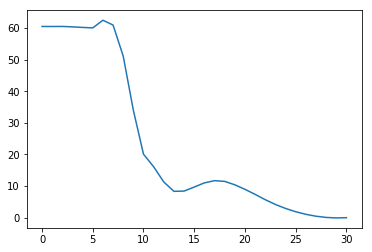

In [8]:
import pylab as plt
plt.plot(int_T)
plt.show() 

In [12]:
zles = np.linspace(0+10,2000, 45)
print zles, z_half[1:][::-1], int_T[1:][::-1]
int_T_les = np.interp(zles, z_half[1:][::-1] , int_T[1:][::-1])

print (int_T_les[1] - int_T_les[0])/(zles[1] - zles[0])*alpha[-1]

[   10.            55.22727273   100.45454545   145.68181818   190.90909091
   236.13636364   281.36363636   326.59090909   371.81818182   417.04545455
   462.27272727   507.5          552.72727273   597.95454545   643.18181818
   688.40909091   733.63636364   778.86363636   824.09090909   869.31818182
   914.54545455   959.77272727  1005.          1050.22727273  1095.45454545
  1140.68181818  1185.90909091  1231.13636364  1276.36363636  1321.59090909
  1366.81818182  1412.04545455  1457.27272727  1502.5         1547.72727273
  1592.95454545  1638.18181818  1683.40909091  1728.63636364  1773.86363636
  1819.09090909  1864.31818182  1909.54545455  1954.77272727  2000.        ] [     0.            112.15596008    223.86776733    335.1473999
    446.01733398    556.54284668    666.88745117    777.40216064
    888.75128174   1002.17828369   1119.68518066   1244.20373535
   1380.03723145   1533.37438965   1712.76452637   1929.70336914
   2199.23925781   2540.54321289   2977.41137695   3538.

In [24]:
imetl = np.zeros(zles.shape[0])
conserv_interp(p_half, z_half, T, zles, imetl)

(45,)
(31,)
(45,)
